In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pickle
import warnings

In [ ]:
df = pd.read_csv("/content/EEG_Eye_State_Classification.csv.zip")

In [ ]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [ ]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
df.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')

In [ ]:
df.shape

(14980, 15)

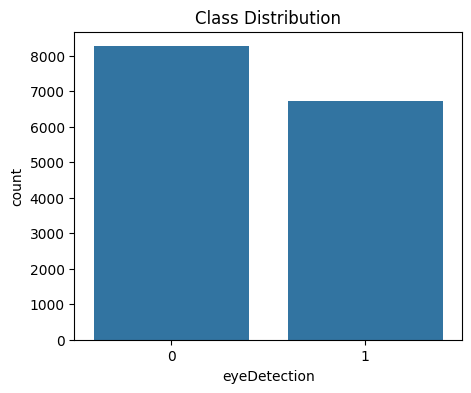

In [ ]:
#Plotting Class Distribution

plt.figure(figsize=(5,4))
sns.countplot(x="eyeDetection", data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
# Taking x and y

X = df.drop("eyeDetection", axis=1)
y = df["eyeDetection"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12)

In [ ]:
# Models
accuracy_results = {}

lr = LogisticRegression()
nb = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
svm_pred = svm.predict(X_test)
knn_pred = knn.predict(X_test)

accuracy_results["Logistic Regression"] = accuracy_score(y_test, lr_pred)
accuracy_results["Naive Bayes"] = accuracy_score(y_test, nb_pred)
accuracy_results["Support Vector Machine"] = accuracy_score(y_test, svm_pred)
accuracy_results["K-Nearest Neighbors"] = accuracy_score(y_test, knn_pred)

In [ ]:
accuracy_results

{'Logistic Regression': 0.5771028037383178,
 'Naive Bayes': 0.4499332443257677,
 'Support Vector Machine': 0.62716955941255,
 'K-Nearest Neighbors': 0.8311081441922563}

In [ ]:
# Model Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


--- Random Forest Results ---
Accuracy: 0.9285714285714286
Confusion Matrix:
 [[1564   79]
 [ 135 1218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1643
           1       0.94      0.90      0.92      1353

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



In [ ]:
# Model Neural Network

model = Sequential([
    Dense(14, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=6,batch_size=32,validation_split=0.2)

Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5609 - loss: 0.6811 - val_accuracy: 0.6066 - val_loss: 0.6615
Epoch 2/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6051 - loss: 0.6457 - val_accuracy: 0.6258 - val_loss: 0.6593
Epoch 3/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6281 - loss: 0.6275 - val_accuracy: 0.6437 - val_loss: 0.6818
Epoch 4/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6517 - loss: 0.6172 - val_accuracy: 0.6537 - val_loss: 0.6937
Epoch 5/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6712 - loss: 0.5896 - val_accuracy: 0.6646 - val_loss: 0.7282
Epoch 6/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6844 - loss: 0.5787 - val_accuracy: 0.6804 - val_loss: 0.7584


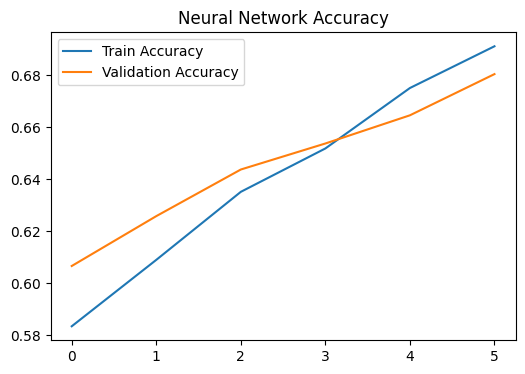

In [ ]:
# Plotting accuracy

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Neural Network Accuracy")
plt.show()

In [ ]:
# Evaluate Neural Network

model.evaluate(X_test, y_test)
nn_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\n--- Neural Network Results ---")
print("Accuracy:", accuracy_score(y_test, nn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("Classification Report:\n", classification_report(y_test, nn_pred))

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.5655
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- Neural Network Results ---
Accuracy: 0.6995994659546061
Confusion Matrix:
 [[1366  277]
 [ 623  730]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75      1643
           1       0.72      0.54      0.62      1353

    accuracy                           0.70      2996
   macro avg       0.71      0.69      0.69      2996
weighted avg       0.70      0.70      0.69      2996



In [ ]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(rf, file)